**Classifying Muffins and Cupcakes with SVM**

__Step 1:__ Import Packages

In [2]:
# -*- coding: utf-8 -*-
# Packages for analysis
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.ticker as plticker

# Packages for visuals
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Allows charts to appear in the notebook
%matplotlib inline

# Pickle package
import pickle

In [5]:
# -*- coding: utf-8 -*-

__Step 2:__ Import Data

In [4]:
# Read in muffin and cupcake ingredient data
recipes = pd.read_csv(r'C:\Users\Philipe Leal\Dropbox\Profissao\Python\Classificadores\muffin-cupcake-master\recipes_muffins_cupcakes.csv')
recipes

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0
5,Muffin,55,27,3,7,5,2,1,0
6,Muffin,54,27,7,5,5,2,0,0
7,Muffin,47,26,10,10,4,1,0,0
8,Muffin,50,17,17,8,6,1,0,0
9,Muffin,50,17,17,11,4,1,0,0


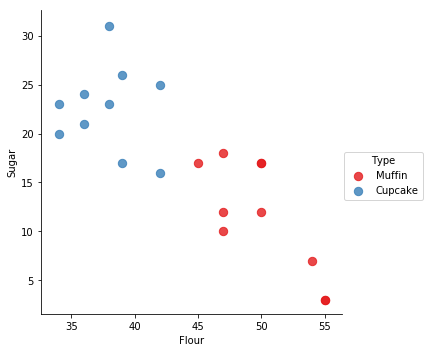

In [6]:
# Plot two ingredients
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', 
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

__Step 3:__ Prepare the Data

In [111]:
# Specify inputs for the model
# ingredients = recipes[['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']].as_matrix()
ingredients = recipes[['Flour','Sugar']].as_matrix()
type_label = np.where(recipes['Type']=='Muffin', 0, 1)

print (ingredients)

print('')
print('')

print(type_label)

[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [129]:
# Feature names
recipe_features = recipes.columns.values[1:].tolist()

print("Recipe features é: ", type(recipe_features))

print('')

print(recipe_features)

('Recipe features \xc3\xa9: ', <type 'list'>)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']


__Step 4:__ Fit the Model

In [130]:
# Fit the SVM model
model = svm.SVC(kernel='linear')
model.fit(ingredients, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

__Step 5:__ Visualize Results

In [133]:
# Get the separating hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(30, 60)
yy = a * xx - (model.intercept_[0]) / w[1]

print(xx)
print(yy)
# Plot the parallels to the separating hyperplane that pass through the support vectors
b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

[ 30.          30.6122449   31.2244898   31.83673469  32.44897959
  33.06122449  33.67346939  34.28571429  34.89795918  35.51020408
  36.12244898  36.73469388  37.34693878  37.95918367  38.57142857
  39.18367347  39.79591837  40.40816327  41.02040816  41.63265306
  42.24489796  42.85714286  43.46938776  44.08163265  44.69387755
  45.30612245  45.91836735  46.53061224  47.14285714  47.75510204
  48.36734694  48.97959184  49.59183673  50.20408163  50.81632653
  51.42857143  52.04081633  52.65306122  53.26530612  53.87755102
  54.48979592  55.10204082  55.71428571  56.32653061  56.93877551
  57.55102041  58.16326531  58.7755102   59.3877551   60.        ]
[  1.15779472e+16   1.10528750e+16   1.05278028e+16   1.00027306e+16
   9.47765844e+15   8.95258624e+15   8.42751405e+15   7.90244185e+15
   7.37736965e+15   6.85229746e+15   6.32722526e+15   5.80215306e+15
   5.27708087e+15   4.75200867e+15   4.22693647e+15   3.70186428e+15
   3.17679208e+15   2.65171988e+15   2.12664769e+15   1.6015754

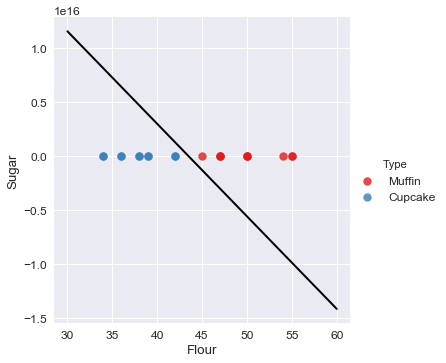

In [18]:
# Plot the hyperplane
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black');

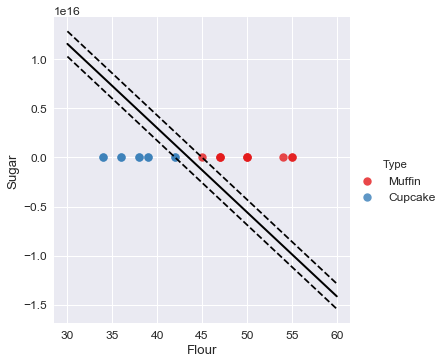

In [19]:
# Look at the margins and support vectors
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=80, facecolors='none');

__Step 6:__ Predict New Case

In [20]:
# Create a function to guess when a recipe is a muffin or a cupcake
def muffin_or_cupcake(flour, sugar):
    if(model.predict([[flour, sugar]]))==0:
        print('You\'re looking at a muffin recipe!')
    else:
        print('You\'re looking at a cupcake recipe!')

In [21]:
# Predict if 50 parts flour and 20 parts sugar
muffin_or_cupcake(50, 20)

You're looking at a muffin recipe!


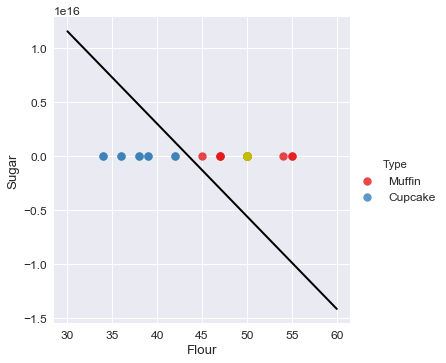

In [23]:
# Plot the point to visually see where the point lies
sns.lmplot('Flour', 'Sugar', data=recipes, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s": 70})
plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(50, 20, 'yo', markersize='9');

In [24]:
# Predict if 40 parts flour and 20 parts sugar
muffin_or_cupcake(40,20)

You're looking at a cupcake recipe!


In [137]:
muffin_cupcake_dict = {'muffin_cupcake_model': model, 'muffin_cupcake_features': ['Flour','Sugar'], 'all_features': recipe_features}

In [138]:
muffin_cupcake_dict

{'all_features': ['Flour',
  'Milk',
  'Sugar',
  'Butter',
  'Egg',
  'Baking Powder',
  'Vanilla',
  'Salt'],
 'muffin_cupcake_features': ['Flour', 'Sugar'],
 'muffin_cupcake_model': SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
   decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
   max_iter=-1, probability=False, random_state=None, shrinking=True,
   tol=0.001, verbose=False)}

In [139]:
# Pickle
pickle.dump(muffin_cupcake_dict, open("muffin_cupcake_dict.p", "wb"))

In [140]:
# S = String
pickle.dumps(muffin_cupcake_dict)

"(dp0\nS'muffin_cupcake_features'\np1\n(lp2\nS'Flour'\np3\naS'Sugar'\np4\nasS'muffin_cupcake_model'\np5\nccopy_reg\n_reconstructor\np6\n(csklearn.svm.classes\nSVC\np7\nc__builtin__\nobject\np8\nNtp9\nRp10\n(dp11\nS'_impl'\np12\nS'c_svc'\np13\nsS'kernel'\np14\nS'linear'\np15\nsS'verbose'\np16\nI00\nsS'probability'\np17\nI00\nsS'classes_'\np18\ncnumpy.core.multiarray\n_reconstruct\np19\n(cnumpy\nndarray\np20\n(I0\ntp21\nS'b'\np22\ntp23\nRp24\n(I1\n(I2\ntp25\ncnumpy\ndtype\np26\n(S'i4'\np27\nI0\nI1\ntp28\nRp29\n(I3\nS'<'\np30\nNNNI-1\nI-1\nI0\ntp31\nbI00\nS'\\x00\\x00\\x00\\x00\\x01\\x00\\x00\\x00'\np32\ntp33\nbsS'support_'\np34\ng19\n(g20\n(I0\ntp35\ng22\ntp36\nRp37\n(I1\n(I3\ntp38\ng29\nI00\nS'\\x03\\x00\\x00\\x00\\x0b\\x00\\x00\\x00\\x0f\\x00\\x00\\x00'\np39\ntp40\nbsS'dual_coef_'\np41\ng19\n(g20\n(I0\ntp42\ng22\ntp43\nRp44\n(I1\n(I1\nI3\ntp45\ng26\n(S'f8'\np46\nI0\nI1\ntp47\nRp48\n(I3\nS'<'\np49\nNNNI-1\nI-1\nI0\ntp50\nbI00\nS'\\x19;\\x16\\x81\\xfdo\\xcc\\xbf5\\xdf\\xda9\\x1aG\\xc9? \

In [ ]:
from sklearn import k